**Ejercicio**
La Temperatura de la acetona para diferentes valores de la presión

| P (atm) | 1    | 2    | 5     | 10    | 20    | 30    | 40    |
|---------|------|------|-------|-------|-------|-------|-------|
| T (°C)  | 56.5 | 78.6 | 113.0 | 144.5 | 181.0 | 205.0 | 214.5 |

1. Construir un polinomio que pase por cada uno de los puntos.
2. Use el polinomio para aproximar la temperatura para una presión de **P = 35 atm** y compárela con **T = 212.3**.
3. Realice una gráfica del polinomio junto con los puntos de los datos observados.

In [8]:
from SistemasEcuacionesLineales.EliminacionGaussiana.EliminacionGaussiana import eliminacion_gaussiana

import matplotlib.pyplot as plt
import numpy as np


# Tamaño de la matriz que se genera para determinar los coeficientes del polinomio
def matriz_polinomial(x_data):
    n = len(x_data)

    # declarar una matriz de ceros para llenar dependiente de los valores de x_data
    M = np.zeros([n,n], float)
    M[0:n,0] = 1
    for i in range(n):
        for j in range(1, n):
            M[i,j] = M[i, j-1]*x_data[i]
    return M

x_data = np.array([1, 2, 5, 10, 20, 30, 40])
y_data = np.array([56.5, 78.6, 113.0, 144.5, 181.0, 205.0, 214.5])

coef = eliminacion_gaussiana(matriz_polinomial(x_data), y_data)
print(coef)

[ 2.46579836e+01  3.78906753e+01 -6.70417520e+00  6.90577562e-01
 -3.59354052e-02  8.82197062e-04 -8.09043220e-06]


In [9]:
# Construcción del polinomio

polinomio = lambda x: sum(coef[i]*x**i for i in range(len(coef)))
ux = np.linspace(min(x_data), max(x_data), 100)

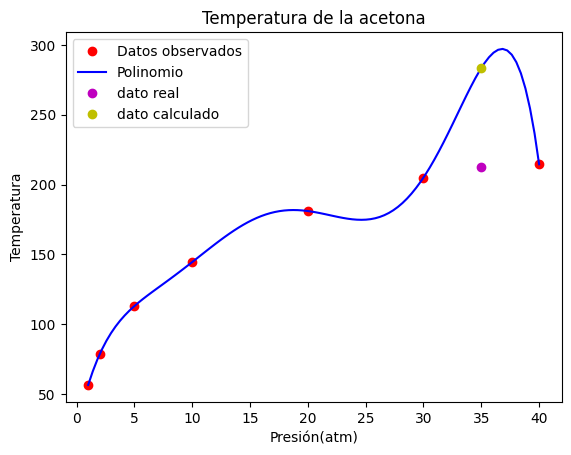

In [10]:
# Graficamos

plt.plot(x_data, y_data, 'ro', label='Datos observados')
plt.plot(ux, polinomio(ux), 'b', label='Polinomio')
plt.plot(35, 212.3,'mo', label='dato real')
plt.plot(35, polinomio(35), 'yo', label='dato calculado')

plt.xlabel('Presión(atm)')
plt.ylabel('Temperatura')
plt.title('Temperatura de la acetona')
plt.legend()
plt.show()